<div style="
    background: linear-gradient(to right, #0f0c29, #302b63);
    padding: 30px;
    border-radius: 12px;
    color: #ffffff;
    text-align: center;
    font-family: 'Helvetica Neue', sans-serif;
    box-shadow: 0 4px 20px rgba(0, 0, 0, 0.4);
">
    <h1 style="margin-bottom: 10px;"> 📉 Employee Performance Analysis ML System 📊</h1>
    <p style="font-size: 18px;"><strong>Author:</strong> Olukayode Daniel (M.Sc)</p>
    <p style="font-size: 18px;"><strong>Profession:</strong> Data Scientist | BI Analyst</p>
    <p style="font-size: 18px;"><strong>Date:</strong> July 2025</p>
    <p style="font-size: 18px;">
        <strong>GitHub:</strong> 
        <a href="https://github.com/Olukayode-Daniel11/DS-Projects-Portfolio.git" style="color: #a5d8ff;" target="_blank">
            github.com/Olukayode-Daniel11/DS-Projects-Portfolio
        </a>
    </p>
    <p style="font-size: 18px;">       
        <strong>Email:</strong> 
        <a href="mailto:olukayodedaniel11@gmail.com" style="color: #a5d8ff;" target="_blank">
            olukayodedaniel11@gmail.com
        </a>
    </p>
</div>

<div style="background: linear-gradient(to right, #e6f0ff, #cce0ff); padding: 25px; border-radius: 12px; color: #000; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">

### **📘PROBLEM STATEMENT**

This business case is on **Employee Performance Analysis**. INX Future Inc. (INX) is experiencing a **decline in employee performance** despite being recognized as a top employer of the best talents. In recent years, the employee performance indexes have not been healthy, and as a result, the company's leadership seeks **data-driven insights** to identify the root causes of the declining performance without harming employee morale and the organization's brand reputation.

---

### **🎯PROJECT OBJECTIVE**

The objective of this project is to analyze employee data with the aim of:
- Uncovering the **key factors** that influence employee performance
- Identifying **performance trends** across various departments
- Building a **machine learning model** capable of predicting employees’ performance levels
- Providing **actionable recommendations** that can help improve overall performance while preserving employee morale and maintaining the company’s top employer brand reputation.  
 

---

### **🧾PROJECT SUMMARY**

INX Future Inc. (INX) is a **globally recognized leader** in data analytics and automation, renowned for its employee-friendly policies and consistent ranking as a **top 20 employer**. However, in recent years, the organization has faced a **decline in employee performance indicators** and an **8% drop in client satisfaction**.  
Concerned about the impact of direct penalization on team morale and INX’s reputation as a preferred employer, the CEO has instructed a **data science-driven investigation** to this cause. As a result, this project aimed to analyze current employee data to uncover the root causes of underperformance and identify key indicators of non-performing employees. Additionally, the project involves developing a predictive machine learning system that enables the HR team to assess prospective hires based on critical performance indicators, seamlessly integrating data-driven evaluation into the organization’s recruitment workflow. Insights derived from the analysis will guide strategic, fair, and morale-preserving interventions, ultimately empowering the organization to attract, retain, and develop talent capable of sustaining its reputation as a top global employer..

</div>


In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import pickle
from sklearn.pipeline import Pipeline
%matplotlib inline
warnings.filterwarnings('ignore')

In [182]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [184]:
df.shape

(1200, 28)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [188]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [190]:
df.duplicated().sum()

0

In [19]:
df['EmpDepartment'].value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [27]:
print(df[['EmpDepartment', 'PerformanceRating']].head(10))

     EmpDepartment  PerformanceRating
0            Sales                  3
1            Sales                  3
2            Sales                  4
3  Human Resources                  3
4            Sales                  3
5      Development                  4
6            Sales                  3
7      Development                  3
8      Development                  3
9      Development                  3


In [29]:
# 4. Group by Employee Department and Calculate Mean Performance Rating.

dept_perf = df.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)
dept_perf

EmpDepartment
Development               3.085873
Data Science              3.050000
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Finance                   2.775510
Name: PerformanceRating, dtype: float64

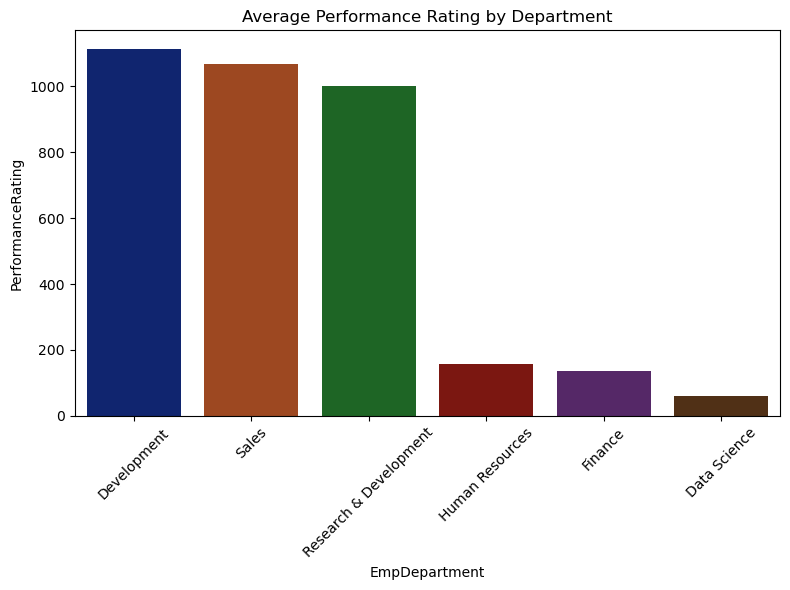

In [69]:
# 5. Visualization of Department-Wise Performance.

plt.figure(figsize=(8,6))
sns.barplot(x=dept_perf.index, y=dept_perf.values, palette='dark')
plt.title('Average Performance Rating by Department')
plt.xlabel('EmpDepartment')
plt.ylabel('PerformanceRating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background: linear-gradient(to right, #e6f0ff, #cce0ff); padding: 25px; border-radius: 12px; color: #000; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">

### **Insights from Department-Wise Performance Analysis**

The plot reveals notable variations in average **employee performance rating** across departments.  
Certain departments like **Development, Sales, and Research & Development** consistently outperform others, while **Human Resources, Finance, and Data Science** show relatively lower performance.  
This suggests a need to investigate **departmental workflows, leadership quality, or resource allocation**. High-performing departments could serve as benchmarks for struggling teams. Overall, this analysis is a wake-up call for top management to prioritize **HR and managerial interventions** where they are most needed.

</div>

In [193]:
#Dropped EmpNumber Column because it has no significant impact on Employees Performance Rating

df.drop('EmpNumber', axis=1, inplace=True)

In [195]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,...,2,6,3,3,6,5,0,4,No,4
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,...,1,4,2,3,1,0,0,0,No,3
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,...,3,20,3,3,20,8,3,8,No,3
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,...,2,9,3,4,8,7,7,7,No,3


In [21]:
# Encoding categorical columns TEMPORARILY to calculate correlation results and-
# extract Top 10 Correlated X-Variables with respect to Y-Variable.

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

In [23]:
# Execution of correlation matrix.

corr_matrix = df_encoded.corr(numeric_only=True)

In [25]:
corr_with_perf = corr_matrix['PerformanceRating'].drop('PerformanceRating').sort_values(key=abs, ascending=False)

In [27]:
# Display top 10 Features with respect to Employee Performance Rating.

top10_corr = corr_with_perf.head(10)
print(top10_corr)

EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
YearsSinceLastPromotion        -0.167629
EmpDepartment                  -0.162615
ExperienceYearsInCurrentRole   -0.147638
EmpWorkLifeBalance              0.124429
YearsWithCurrManager           -0.122313
ExperienceYearsAtThisCompany   -0.111645
EmpJobRole                     -0.096209
EmpJobLevel                    -0.076632
Name: PerformanceRating, dtype: float64


In [29]:
# Top 10 correlated features with respect to Performance Rating using the Correlation Heatmap Analysis Approach.

top_features = top10_corr.index.tolist()
top_features.append('PerformanceRating')

In [31]:
df_top_corr = df_encoded[top_features]

In [33]:
top_corr_matrix = df_top_corr.corr()

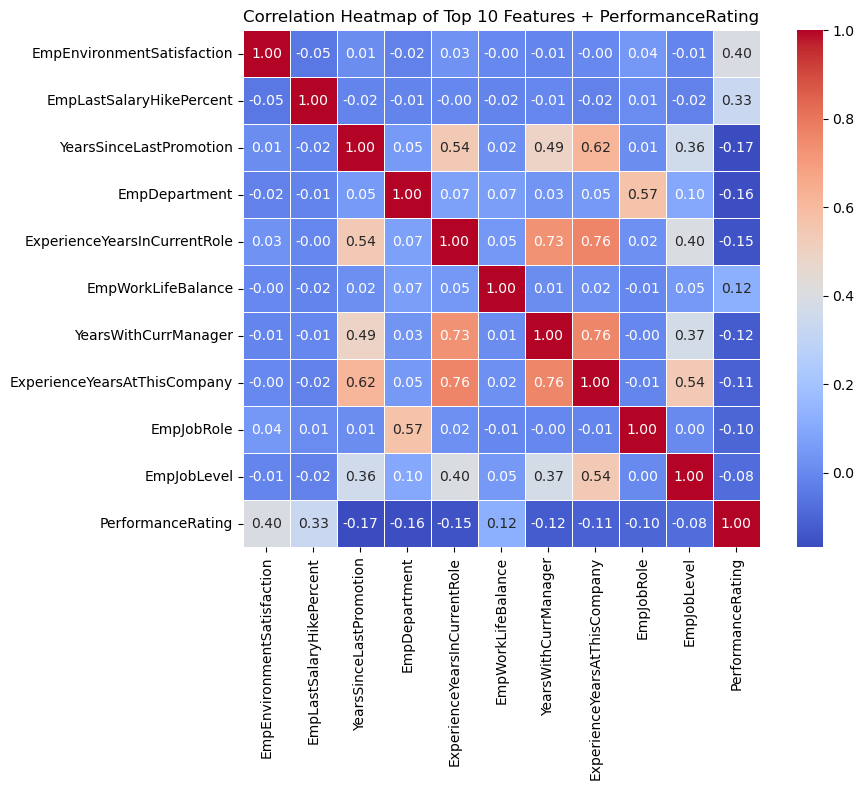

In [35]:
# Plot heatmap.

plt.figure(figsize=(10,8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Top 10 Features + PerformanceRating')
plt.tight_layout()
plt.show()

<div style="background: linear-gradient(to right, #e6f0ff, #cce0ff); padding: 25px; border-radius: 12px; color: #000; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">


### Top 3 Features Influencing Employee Performance (Correlation-Based)

Based on the correlation matrix analysis:

1. **EmpEnvironmentSatisfaction** (**+0.40**):  
   A moderate positive correlation exists between **employee work environment Satisfaction** and **employee performance**. Employees who reported higher satisfaction with their work environment tend to have significantly better performance ratings.

2. **EmpLastSalaryHikePercent** (**+0.33**):  
   A moderate positive correlation also exists between **salary hike** and **performance** — suggesting that timely and fair compensation adjustments may boost employee performance.

3. **EmpWorkLifeBalance** (**+0.12**):  
   While a weaker correlation, **work-life balance** still shows a positive relationship with **performance**, indicating its potential influence on sustained employee productivity.



#### Multicollinearity Observations:

In the context of **"Employee Performance Analysis"**, This dataset exhibits notable multicollinearity among input features, with correlation coefficients ranging from **+0.62 to 0.76**. Despite this, I have chosen not to drop these highly correlated features. The machine learning models I applied such as Random Forest, Support Vector Classifier and Extreme Gradient Boosting are inherently capable of handling multicollinearity, allowing them to effectively navigate complex relationships between features without being compromised by correlations. Furthermore, in this domain, retaining a comprehensive set of features is crucial to enable the model to learn nuanced patterns and relationships that drive **employee performance**. Dropping features due to multicollinearity could limit the model's ability to capture important insights, ultimately impacting its performance and usefulness in informing strategic organizational decisions. By retaining all relevant features and leveraging suitable models, I'm able to develop a robust and accurate Employee Performance Analysis model that provides actionable insights for the top management of **INX Future Inc**.

In [41]:
# DATA PREPROCESSING(ENCODING & SCALING)

# Defined the categorical and numerical columns
categorical_cols = ['EmpDepartment', 'EmpJobRole'] 
numerical_cols = ['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'YearsSinceLastPromotion', 'ExperienceYearsInCurrentRole',
                 'EmpWorkLifeBalance', 'YearsWithCurrManager', 'ExperienceYearsAtThisCompany', 'EmpJobLevel']

In [43]:
# Separated the X-variables and y-variable in the Dataset.

X = df.drop("PerformanceRating", axis=1)
y = df["PerformanceRating"]

In [45]:
# Defined the ColumnTransformer object via a data-pipeline.

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [47]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['EmpEnvironmentSatisfaction',
                                  'EmpLastSalaryHikePercent',
                                  'YearsSinceLastPromotion',
                                  'ExperienceYearsInCurrentRole',
                                  'EmpWorkLifeBalance', 'YearsWithCurrManager',
                                  'ExperienceYearsAtThisCompany',
                                  'EmpJobLevel']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['EmpDepartment', 'EmpJobRole'])])

In [49]:
#Transformed numerical features and categorical features respectively.

X_processed = preprocessor.fit_transform(X)

In [53]:
# Created a Pickle File.

with open("emp_performance_preprocessor.pkl", "wb") as file:
    pickle.dump(preprocessor, file)

In [60]:
# Loaded pickle for model building phase.

with open("emp_performance_preprocessor.pkl", "rb") as f:
    X_loaded = pickle.load(f)

In [79]:
# Train-test split the data(80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=3, stratify=y)

In [88]:
from imblearn.over_sampling import SMOTE

# SMOTE TECHNIQUE Applied for Target Variable Class-Imbalancing.

sm = SMOTE(random_state=3)

# Resampling training data.

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train_resampled, y_train_resampled)

# Predict

y_pred = rf.predict(X_test)

In [93]:
# Model Evaluation using Accuracy & F1_Score.

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Evaluation Metrics (Top 10 Features Model)")
print("Accuracy:", round(accuracy, 4))
print("F1 Score (macro):", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Evaluation Metrics (Top 10 Features Model)
Accuracy: 0.9333
F1 Score (macro): 0.8933

Classification Report:
               precision    recall  f1-score   support

           2       0.91      0.82      0.86        39
           3       0.94      0.98      0.96       175
           4       0.91      0.81      0.86        26

    accuracy                           0.93       240
   macro avg       0.92      0.87      0.89       240
weighted avg       0.93      0.93      0.93       240



In [95]:
y_train_resampled.value_counts(normalize=True)

PerformanceRating
3    0.333333
2    0.333333
4    0.333333
Name: proportion, dtype: float64

In [77]:
# Define parameter grid

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [98]:
# GridSearch setup

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=3),
    param_grid=rf_params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [100]:
# Fit/Apply Hyperparameter Tuning(GridSearchCV) on the training data.

rf_grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [197]:
# Fetch the best GridSearchCV parameters to optimize Random Forest Classifier.

best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)

Best Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [104]:
# Predict

y_rf_best_pred = best_rf.predict(X_test)

In [203]:
# Evaluation of Model Performance.

print("Tuned Random Forest (Top 10 Features)")
print("Accuracy:", round(accuracy_score(y_test, y_rf_best_pred), 4))
print("F1 Score (macro):", round(f1_score(y_test, y_rf_best_pred, average='macro'), 4))
print("\nClassification Report:\n", classification_report(y_test, y_rf_best_pred))

Tuned Random Forest (Top 10 Features)
Accuracy: 0.925
F1 Score (macro): 0.881

Classification Report:
               precision    recall  f1-score   support

           2       0.91      0.77      0.83        39
           3       0.93      0.98      0.95       175
           4       0.91      0.81      0.86        26

    accuracy                           0.93       240
   macro avg       0.92      0.85      0.88       240
weighted avg       0.92      0.93      0.92       240



In [110]:
# Adjusted y for XGBoost to ensure classes start at 0 to avoid value error.

y_train_xgb = y_train_resampled - y_train_resampled.min()
y_test_xgb = y_test - y_train_resampled.min()

In [112]:
#Initialize and Fit XGB model on the training data.

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=3)
xgb_model.fit(X_train_resampled, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [114]:
y_xgb_pred = xgb_model.predict(X_test)

In [116]:
# Convertion of classifications back to original labels.

y_xgb_pred_orig = y_xgb_pred + y_train_resampled.min()


In [205]:
print("XGBoost Classifier (Top 10 Features)")
print("Accuracy:", round(accuracy_score(y_test, y_xgb_pred_orig), 4))
print("F1 Score (macro):", round(f1_score(y_test, y_xgb_pred_orig, average='macro'), 4))
print("\nClassification Report:\n", classification_report(y_test, y_xgb_pred_orig))

XGBoost Classifier (Top 10 Features)
Accuracy: 0.925
F1 Score (macro): 0.8838

Classification Report:
               precision    recall  f1-score   support

           2       0.89      0.82      0.85        39
           3       0.94      0.96      0.95       175
           4       0.85      0.85      0.85        26

    accuracy                           0.93       240
   macro avg       0.89      0.88      0.88       240
weighted avg       0.92      0.93      0.92       240



In [126]:
# Initialize and train Support Vector Classifier to learn on the training data.

svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [128]:
# Predict
y_svc_pred = svc_model.predict(X_test)

In [207]:
# Model Evaluation

print("Support Vector Classifier (Top 10 Features)")
print("Accuracy:", round(accuracy_score(y_test, y_svc_pred), 4))
print("F1 Score (macro):", round(f1_score(y_test, y_svc_pred, average='macro'), 4))
print("\nClassification Report:\n", classification_report(y_test, y_svc_pred))

Support Vector Classifier (Top 10 Features)
Accuracy: 0.7833
F1 Score (macro): 0.6974

Classification Report:
               precision    recall  f1-score   support

           2       0.61      0.72      0.66        39
           3       0.90      0.81      0.85       175
           4       0.50      0.69      0.58        26

    accuracy                           0.78       240
   macro avg       0.67      0.74      0.70       240
weighted avg       0.81      0.78      0.79       240



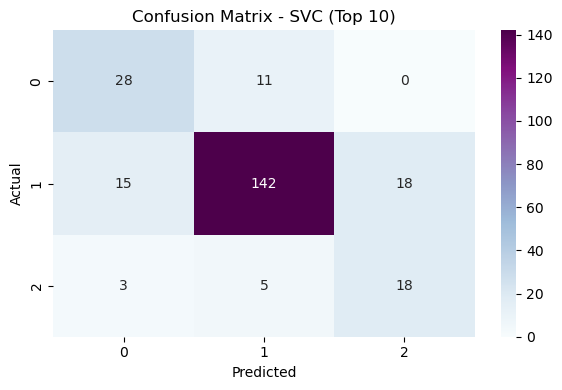

In [132]:
# Confusion Matrix

cm_svc = confusion_matrix(y_test, y_svc_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap='BuPu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVC (Top 10)")
plt.tight_layout()
plt.show()

In [134]:
# Define parameter grid for SVC

svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

In [136]:
# GridSearchCV setup

svc_grid = GridSearchCV(SVC(random_state=42), svc_params, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [209]:
# Extract Best parameters to optimize SVC Classifier.

best_svc = svc_grid.best_estimator_
print("Best SVC Parameters:", svc_grid.best_params_)

Best SVC Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [140]:
# Model Evaluation.

y_svc_best_pred = best_svc.predict(X_test)

In [142]:
print("Accuracy:", round(accuracy_score(y_test, y_svc_best_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_svc_best_pred, average='macro'), 4))
print("\nClassification Report:\n", classification_report(y_test, y_svc_best_pred))

Accuracy: 0.8208
F1 Score: 0.7206

Classification Report:
               precision    recall  f1-score   support

           2       0.69      0.69      0.69        39
           3       0.90      0.88      0.89       175
           4       0.55      0.62      0.58        26

    accuracy                           0.82       240
   macro avg       0.71      0.73      0.72       240
weighted avg       0.83      0.82      0.82       240



In [154]:
# Initialize and train MLP Classifier(ANN).

ann_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=3)
ann_model.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=3)

In [156]:
# Predict.

y_ann_pred = ann_model.predict(X_test)

In [211]:
# Model Evaluation.

print("ANN (MLPClassifier) - Top 10 Features")
print("Accuracy:", round(accuracy_score(y_test, y_ann_pred), 4))
print("F1 Score (macro):", round(f1_score(y_test, y_ann_pred, average='macro'), 4))
print("\nClassification Report:\n", classification_report(y_test, y_ann_pred))

ANN (MLPClassifier) - Top 10 Features
Accuracy: 0.8417
F1 Score (macro): 0.7603

Classification Report:
               precision    recall  f1-score   support

           2       0.76      0.74      0.75        39
           3       0.91      0.89      0.90       175
           4       0.58      0.69      0.63        26

    accuracy                           0.84       240
   macro avg       0.75      0.77      0.76       240
weighted avg       0.85      0.84      0.84       240



#### **Model Performance Summary:**

| Model                   | Accuracy | F1 Score (Macro) | Tuned | SMOTE Applied |
|------------------------|----------|------------------|--------|----------------|
| Random Forest           | 0.93     | 0.88             | Yes   | Yes            |
| SVC                     | 0.82     | 0.72             | Yes   | Yes            |
| XGBoost                 | 0.93     | 0.88             |  No   | Yes            |
| ANN (MLPClassifier)     | 0.84     | 0.76             |  No   | Yes            |

> *Note: Results may vary based on random state, feature selection, and resampling strategy.*

**Conclusion**:
For deployment or further tuning, **Random Forest & XGBoost** are the top performing model based on the overall balance of low error and high accuracy & F1 Score.

---

<div style="background: linear-gradient(to right, #0a1f44, #1e3d8f)
; padding: 20px; border-radius: 10px; font-family: Arial; color: #ffffff;">

<h2>Model Performance Summary</h2>

<p>After training and evaluating classification models on the Employee Performance dataset, the following results were obtained:</p>

<table style="width:100%; border-collapse: collapse; background-color: #ffffff; color: #1a1a1a;">
  <thead style="background-color: #b5179e; color: #ffffff;">
    <tr>
      <th style="padding: 8px; border: 1px solid #ccc;">Model</th>
      <th style="padding: 8px; border: 1px solid #ccc;">Accuracy</th>
      <th style="padding: 8px; border: 1px solid #ccc;">F1 Score (Macro)</th>
      <th style="padding: 8px; border: 1px solid #ccc;">Tuned</th>
      <th style="padding: 8px; border: 1px solid #ccc;">SMOTE Applied</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 8px; border: 1px solid #ccc;">Random Forest</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.93</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.88</td>
      <td style="padding: 8px; border: 1px solid #ccc;">Yes</td>
      <td style="padding: 8px; border: 1px solid #ccc;">Yes</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #ccc;">SVC</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.82</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.72</td>
      <td style="padding: 8px; border: 1px solid #ccc;">Yes</td>
      <td style="padding: 8px; border: 1px solid #ccc;">Yes</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #ccc;">XGBoost</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.93</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.88</td>
      <td style="padding: 8px; border: 1px solid #ccc;">No</td>
      <td style="padding: 8px; border: 1px solid #ccc;">Yes</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #ccc;">ANN (MLPClassifier)</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.84</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.76</td>
      <td style="padding: 8px; border: 1px solid #ccc;">No</td>
      <td style="padding: 8px; border: 1px solid #ccc;">Yes</td>
    </tr>
  </tbody>
</table>

<p><strong>🔍 Insights:</strong><br>
- <strong>Random Forest</strong> and <strong>XGBoost</strong> achieved the best accuracy and F1 scores, making them ideal models for deployment.<br>
- <strong>SVC</strong> and <strong>ANN</strong> performed well but had comparatively lower scores.<br>
- Applying <strong>SMOTE</strong> helped address class imbalance, improving fairness across predictions.</p>

<p><strong>🎯 Conclusion:</strong><br>
For production use, <strong>Random Forest</strong> and <strong>XGBoost</strong> are recommended for their consistent balance of high accuracy and F1 performance.</p>

</div>


<div style="background: linear-gradient(to right, #f0f8ff, #d6eaff); padding: 25px; border-radius: 12px; color: #000; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">

### Recommendations to Improve Employee Performance at INX Future Inc.

Based on the analysis of **employee performance** data, several actionable recommendations are proposed to help **INX Future Inc** address declining performance trends, strengthen workplace satisfaction, and sustain its reputation as a top employer:

---

#### 1. **Enhance Work-Life Balance Programs**
> **Insight:** A positive correlation was found between **EmpWorkLifeBalance** and **PerformanceRating**.

- Introduce or expand flexible work arrangements (e.g., remote work, flexible hours).
- Encourage mandatory time off and workload balancing.
- Invest in wellness initiatives, mental health support, and ergonomic work environments.

---

#### 2. **Improve Workplace Environment and Engagement**
> **Insight:** **EmpEnvironmentSatisfaction** was identified as a top factor influencing **performance**.

- Conduct quarterly surveys to track satisfaction and act on feedback promptly.
- Organize team-building activities and recognition programs.
- Ensure safe, inclusive, and motivating physical and cultural environments.

---

#### 3. **Re-evaluate Compensation and Recognition Structures**
> **Insight:** **EmpLastSalaryHikePercent** showed a notable positive influence on **performance**.

- Benchmark compensation and reward systems to ensure market competitiveness.
- Use performance-linked bonuses to incentivize excellence.
- Communicate transparently about salary policies and appraisal criteria.

---

#### 4. **Focus Interventions by Department**
> **Insight:** Department-wise performance analysis revealed specific departments with consistently lower scores.

- Provide targeted training, mentorship, or leadership development in low-performing departments.
- Analyze workload, team dynamics, and leadership feedback for department-level improvements.

---

#### 5. **Implement Predictive Talent Management**
> **Insight:** A trained machine learning model can now predict performance using key features.

- Integrate the model into recruitment workflows to assess potential hires.
- Use predictive scores to tailor onboarding, development, and retention strategies.
- Continuously monitor and refine the model based on updated employee data.

---

#### 6. **Avoid Blanket Penalization of Low Performers**
> **Insight:** Penalizing underperformers without clear indicators can harm morale and TGW's brand image.

- Use the predictive model and performance insights to identify employees needing support.
- Prioritize coaching, training, or role realignment before considering disciplinary actions.
- Maintain transparency and fairness in all performance-related decisions.

---

By implementing these data-driven recommendations, **INX Future Inc**. can take informed, strategic steps toward reversing the decline in employee performance while protecting its core values and culture of excellence.
